In [23]:
import pandas as pd
from wavhandler import *
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import logging
logger = logging.getLogger()
logger.setLevel(logging.WARN)

plt.rcParams['figure.figsize'] = [14, 10]


## Dataframe Overview

In [29]:
df = pd.read_csv('./data/mosquitos.csv', delimiter=';')
df.drop(['Unnamed: 0', 'Unnamed: 0.1'], axis=1, inplace=True)
df.sample(10)

,fname,names,class,subclass,date,path_len,fname_len,humidity,temperature,evaluation,0,1,2,3,4,5,ampl_1,ampl_2,ampl_3
105952,F170130_162038_168_G_050,/home/yannis/data/insects/Potamitis/Wingbeats/...,Anopheles,An. arabiensis,2017-01-30 16:00:37,11,5,NaN,NaN,0,468.75,937.50,NaN,NaN,NaN,NaN,0.028351,0.028229,0.027954
205193,F161219_110844_226_G_050,/home/yannis/data/insects/Potamitis/Wingbeats/...,Culex,C. quinquefasciatus,2016-12-19 11:08:26,11,5,NaN,NaN,1,468.75,937.50,1375.00,NaN,NaN,NaN,0.061279,0.060516,0.060425
170491,F170123_112241_197_G_050,/home/yannis/data/insects/Potamitis/Wingbeats/...,Anopheles,An. gambiae,2017-01-23 11:22:27,11,5,NaN,NaN,0,843.75,NaN,NaN,NaN,NaN,NaN,0.038971,0.038635,0.038055
41314,F170209_195835_225_G_050,/home/yannis/data/insects/Potamitis/Wingbeats/...,Aedes,Ae. aegypti,2017-02-09 19:56:59,11,5,NaN,NaN,1,625.00,1218.75,1843.75,NaN,NaN,NaN,0.025787,0.024841,0.024658
38634,F170209_172803_099_G_050,/home/yannis/data/insects/Potamitis/Wingbeats/...,Aedes,Ae. aegypti,2017-02-09 17:25:50,11,5,NaN,NaN,1,593.75,1187.50,1781.25,NaN,NaN,NaN,0.031067,0.030609,0.030609
216436,F161219_151022_205_G_050,/home/yannis/data/insects/Potamitis/Wingbeats/...,Culex,C. quinquefasciatus,2016-12-19 15:08:42,11,5,NaN,NaN,1,468.75,968.75,NaN,NaN,NaN,NaN,0.025543,0.024475,0.024323
210313,F161219_123448_226_G_050,/home/yannis/data/insects/Potamitis/Wingbeats/...,Culex,C. quinquefasciatus,2016-12-19 12:33:36,11,5,NaN,NaN,1,437.50,906.25,1343.75,1781.25,NaN,NaN,0.052612,0.052429,0.052094
111999,F170202_203025_101_G_050,/home/yannis/data/insects/Potamitis/Wingbeats/...,Anopheles,An. arabiensis,2017-02-02 20:20:06,11,5,NaN,NaN,0,750.00,1500.00,NaN,NaN,NaN,NaN,0.026642,0.025757,0.025513
207814,F161219_114545_031_G_050,/home/yannis/data/insects/Potamitis/Wingbeats/...,Culex,C. quinquefasciatus,2016-12-19 11:44:53,11,5,NaN,NaN,1,406.25,906.25,NaN,NaN,NaN,NaN,0.042847,0.042419,0.041779
120195,F170314_230148_234_G_050_T_25.9_H_75.1,/home/yannis/data/insects/Potamitis/Wingbeats/...,Anopheles,An. arabiensis,2017-03-14 23:00:27,11,9,75.1,25.9,0,843.75,1687.50,NaN,NaN,NaN,NaN,0.048981,0.047882,0.046997


### Examine Individual Signals

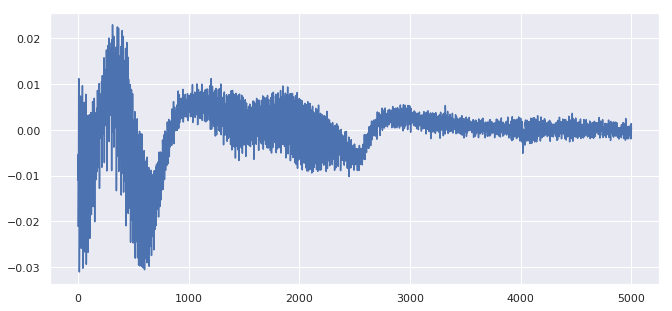

In [25]:
## EXAMINE SIGNAL
all_signal_names = df.set_index('fname').names.tolist()
#signal_name = 'F170214_214608_012_G_050_T_25.9_H_62.8' ##
signal_name = random.choice(all_signal_names).split('/')[-1][:-4]
path_name = [df.set_index('fname').loc[signal_name].names]
signal = read_simple(path_name)[0]
plt.figure(figsize=(24,5))
plt.subplot(1,2,1);plt.plot(signal);
#signal = butter_bandpass_filter(signal, 75., 1000., 8000., order=4)
#plt.subplot(1,2,2);plt.plot(signal);

## Frequencies Histograms

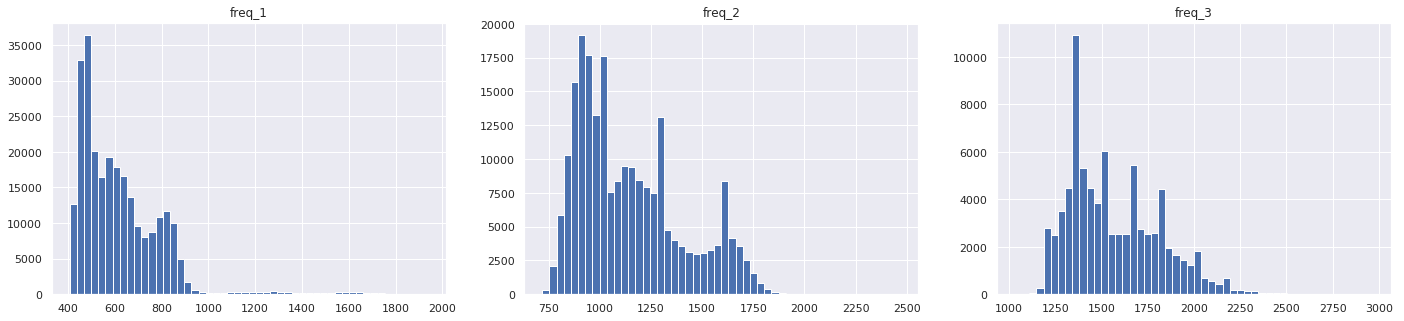

In [26]:
nr_bins = 50
plt.figure(figsize=(24,5))
plt.subplot(1,3,1)
plt.title('freq_1')
df['0'].hist(bins=nr_bins)
plt.subplot(1,3,2)
plt.title('freq_2')
df['1'].hist(bins=nr_bins)
plt.subplot(1,3,3)
plt.title('freq_3')
df['2'].hist(bins=nr_bins)

## Amplitudes Histograms

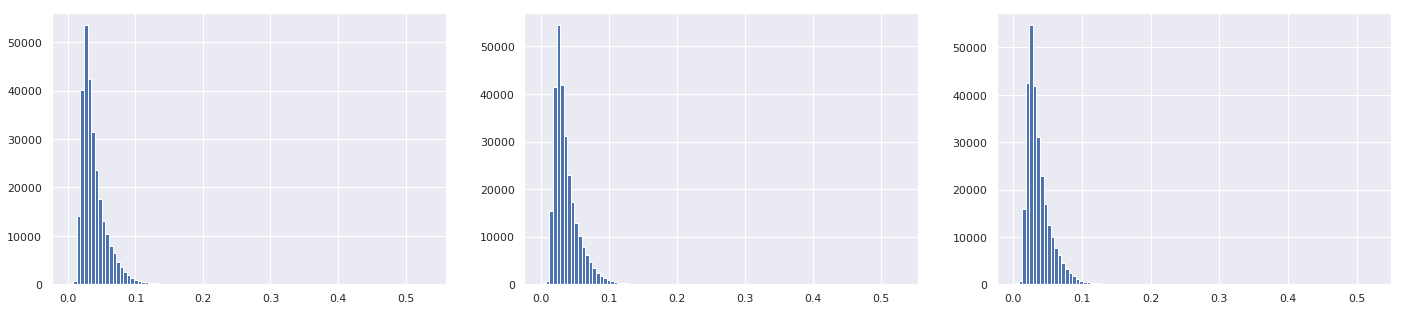

In [27]:
nr_bins = 100
plt.figure(figsize=(24,5))
plt.subplot(1,3,1)
df['ampl_1'].hist(bins=nr_bins)
plt.subplot(1,3,2)
df['ampl_2'].hist(bins=nr_bins)
plt.subplot(1,3,3)
df['ampl_3'].hist(bins=nr_bins)

## Temperature

Percentage of NaNs: 81.33%


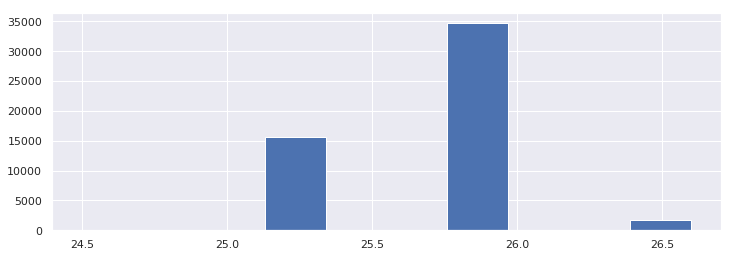

In [28]:
plt.figure(figsize=(12,4))
feature = 'temperature'
df[feature].hist()
print('Percentage of NaNs: {:.2f}%'.format(df[feature].isnull().sum() / df[feature].shape[0] * 100.))

## Humidity

Percentage of NaNs: 81.33%


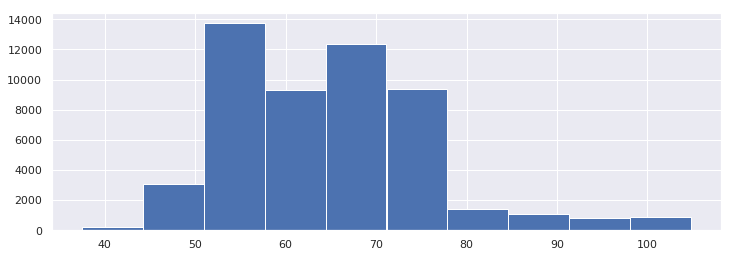

In [8]:
plt.figure(figsize=(12,4))
feature = 'humidity'
df[feature].hist()
print('Percentage of NaNs: {:.2f}%'.format(df[feature].isnull().sum() / df[feature].shape[0] * 100.))